In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('/content/sales_data_with_discounts.csv')
df.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [6]:
print(df.shape)
print(df.columns)


(450, 13)
Index(['Date', 'Day', 'SKU', 'City', 'Volume', 'BU', 'Brand', 'Model',
       'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB


In [8]:
df.isnull().sum()

,0
Date,0
Day,0
SKU,0
City,0
Volume,0
BU,0
Brand,0
Model,0
Avg Price,0
Total Sales Value,0


In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.describe()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049


In [11]:
numerical_cols=df.select_dtypes(include=np.number).columns

In [19]:
stats=pd.DataFrame({
    'MEAN':df[numerical_cols].mean(),
    'MEDIAN':df[numerical_cols].median(),
    'MODE':df[numerical_cols].mode().iloc[0],
    'STANDARD_DIVIATION':df[numerical_cols].std()})
print(stats)

                           MEAN       MEDIAN          MODE  STANDARD_DIVIATION
Volume                 5.066667     4.000000      3.000000            4.231602
Avg Price          10453.433333  1450.000000    400.000000        18079.904840
Total Sales Value  33812.835556  5700.000000  24300.000000        50535.074173
Discount Rate (%)     15.155242    16.577766      5.007822            4.220602
Discount Amount     3346.499424   988.933733     69.177942         4509.902963
Net Sales Value    30466.336131  4677.788059    326.974801        46358.656624


**Data Visualization**

**Histogram**

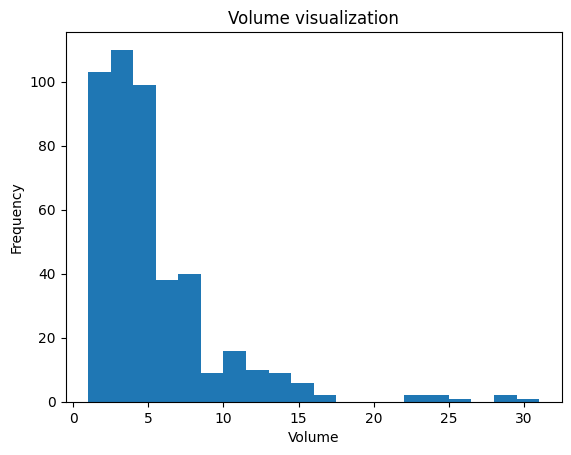

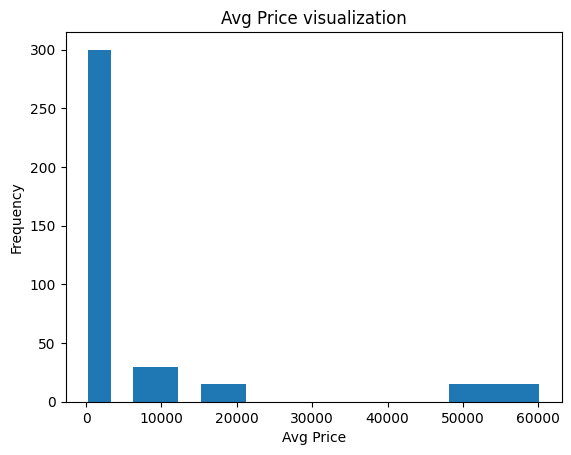

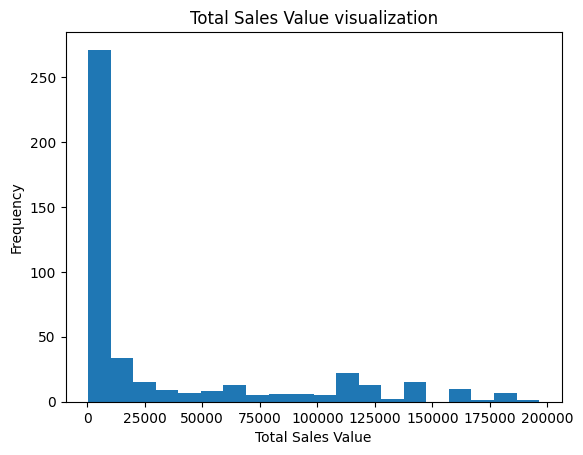

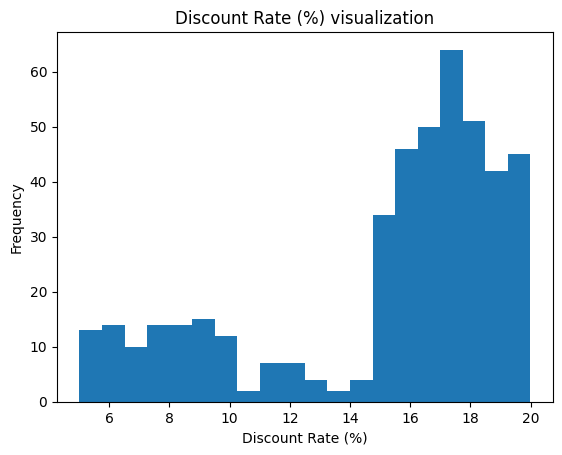

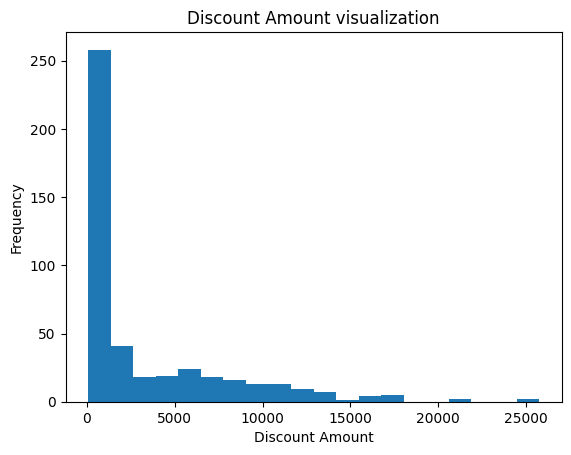

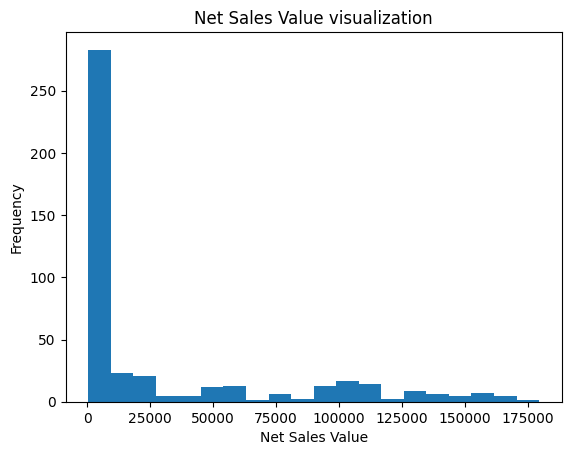

In [20]:
for columns in numerical_cols:
  df[columns].plot(kind='hist',title=f'{columns} visualization', bins=20)
  plt.xlabel(columns)
  plt.ylabel('Frequency')
  plt.show()


**Boxplot**

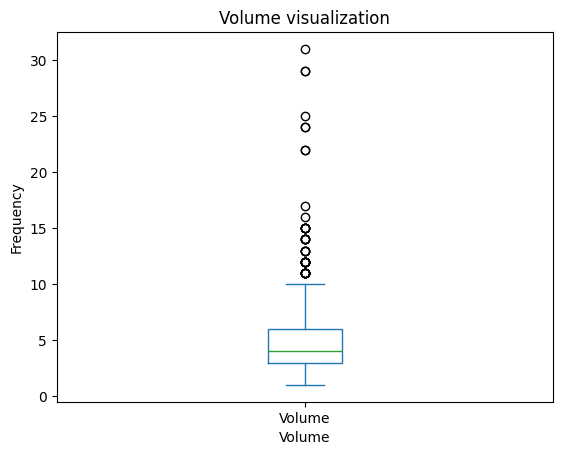

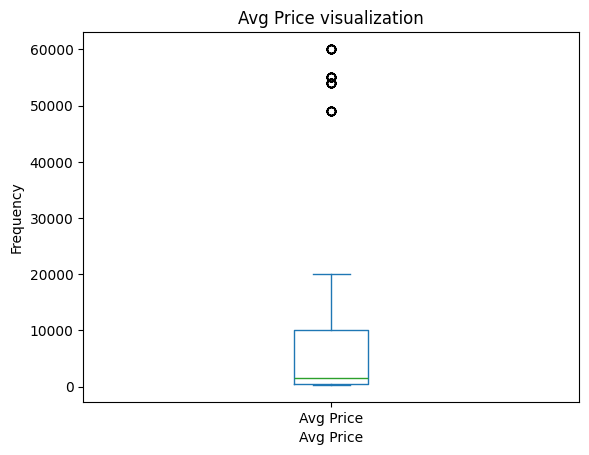

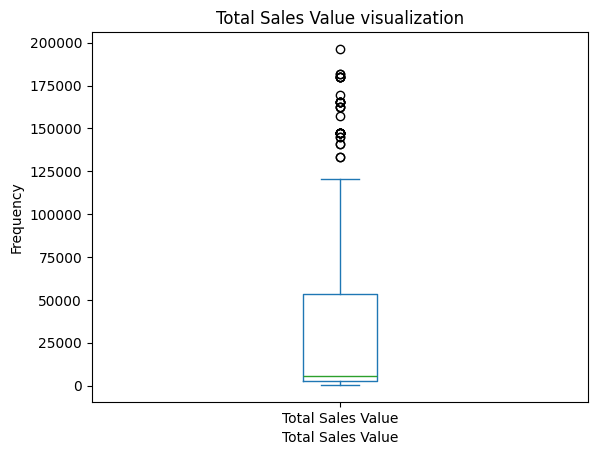

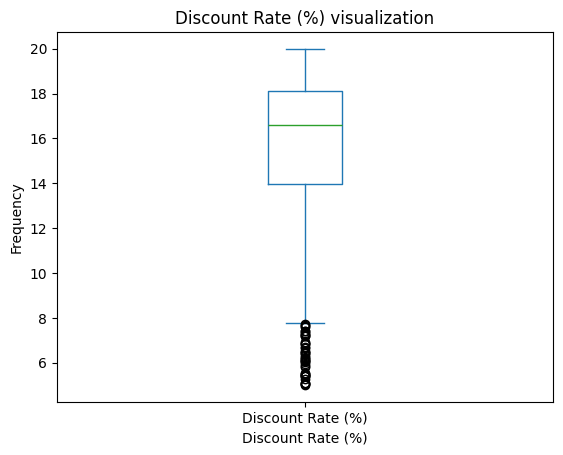

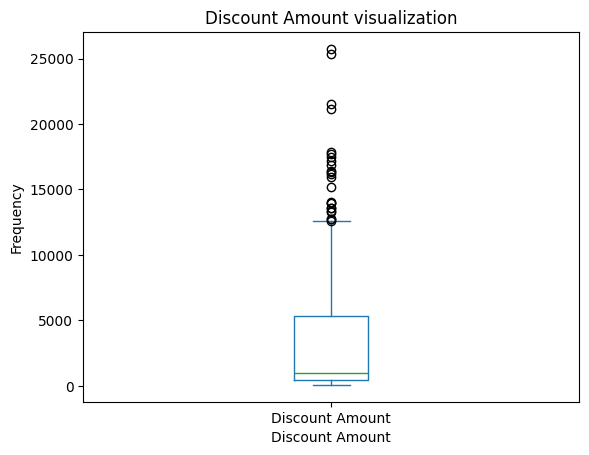

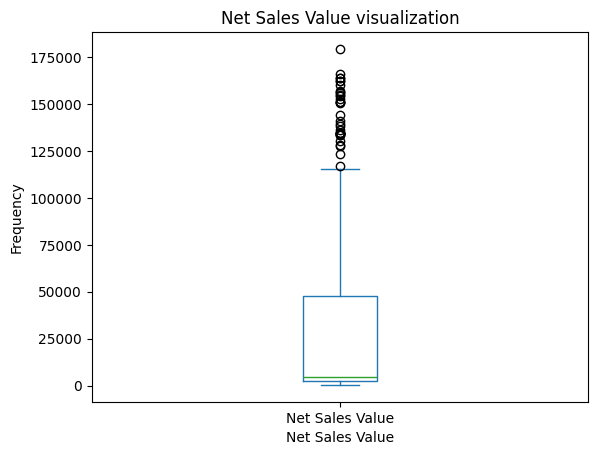

In [21]:
for columns in numerical_cols:
  df[columns].plot(kind='box',title=f'{columns} visualization')
  plt.xlabel(columns)
  plt.ylabel('Frequency')
  plt.show()

In [23]:
categ_cols=df.select_dtypes(include='object').columns
categ_cols

Index(['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model'], dtype='object')

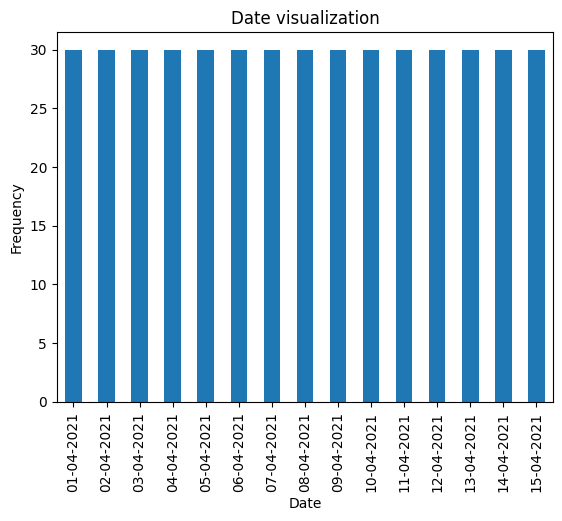

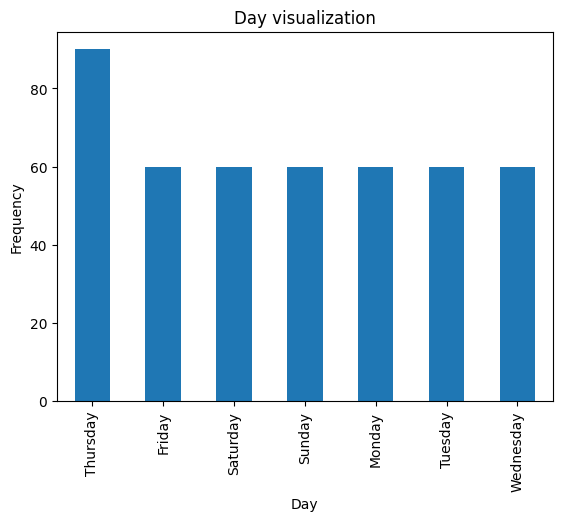

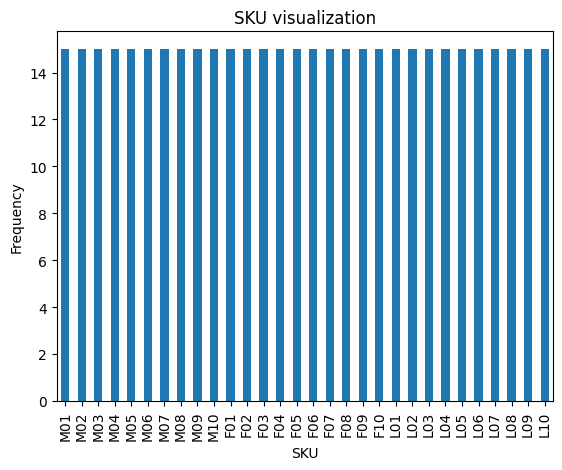

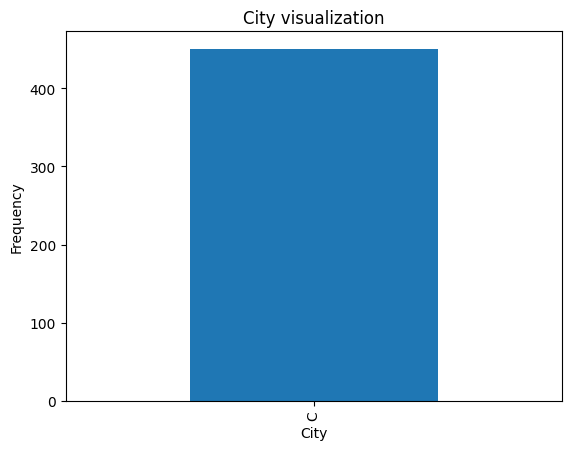

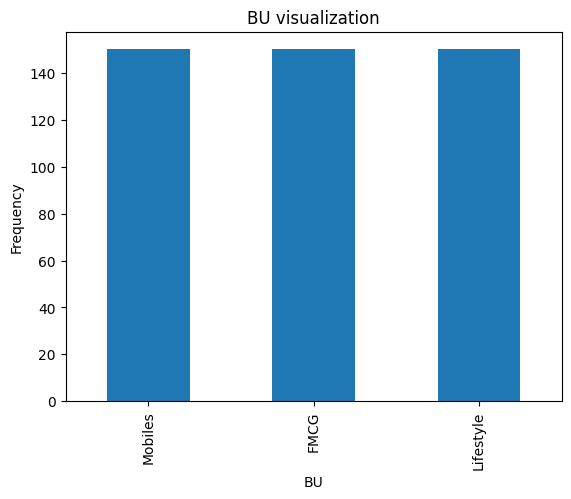

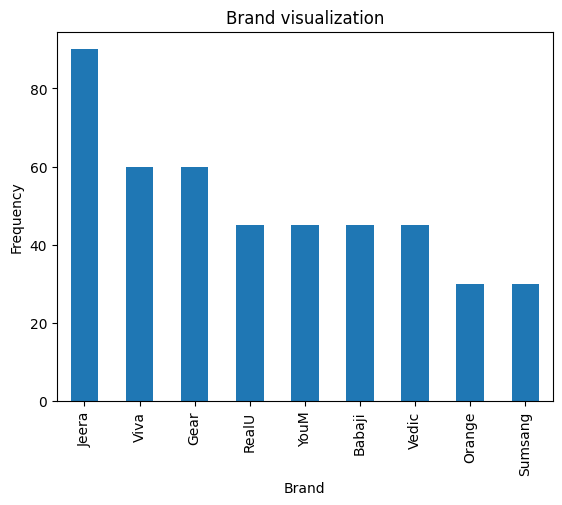

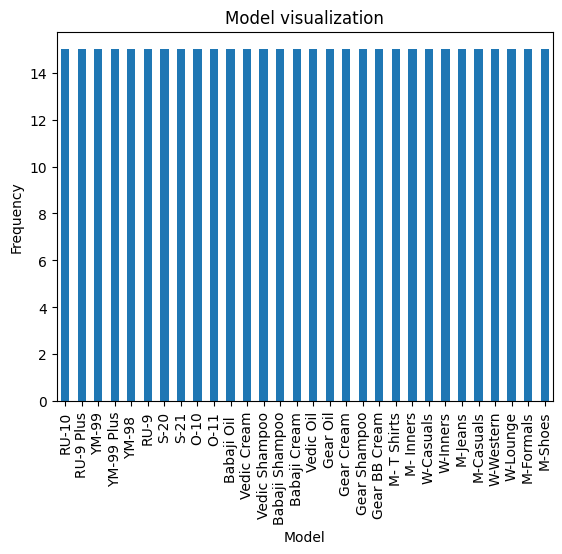

In [24]:
for columns in categ_cols:
  df[columns].value_counts().plot(kind='bar',title=f'{columns} visualization')
  plt.xlabel(columns)
  plt.ylabel('Frequency')
  plt.show()

**Standardization of Numerical Variables**

In [25]:
from sklearn.preprocessing import StandardScaler

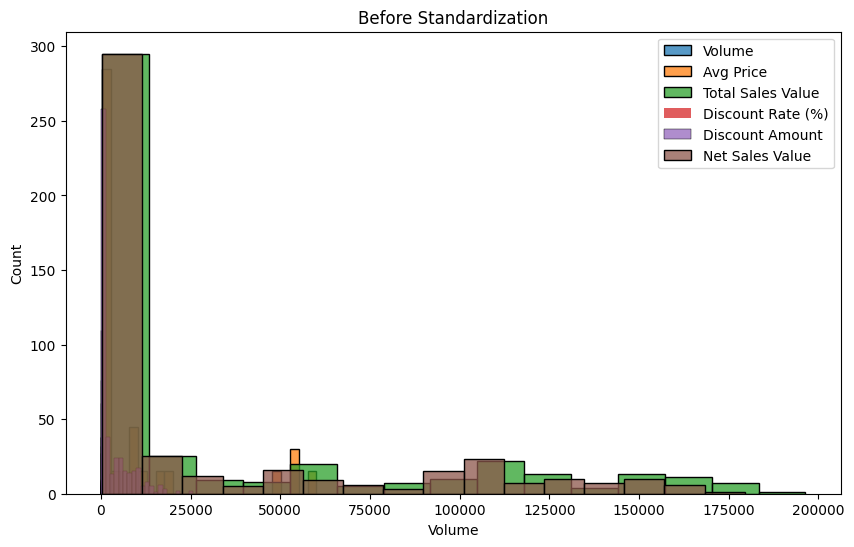

In [30]:
plt.figure(figsize=(10,6))
plt.title('Before Standardization')
for columns in numerical_cols:
    sns.histplot(df[columns],label=columns)
plt.legend()
plt.show()



In [31]:
scaler=StandardScaler()
df[numerical_cols]=scaler.fit_transform(df[numerical_cols])
df[numerical_cols].head()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,2.350029,0.091173,2.925721,-0.830289,3.952816,2.804756
1,1.167129,-0.019570,1.330995,-0.852661,1.849014,1.271026
2,0.457388,0.312659,1.562775,-1.351631,1.622995,1.545675
3,0.220808,0.534146,1.719276,-1.949723,1.113807,1.765810
4,-0.488932,-0.130313,-0.188452,0.673739,0.227852,-0.227595


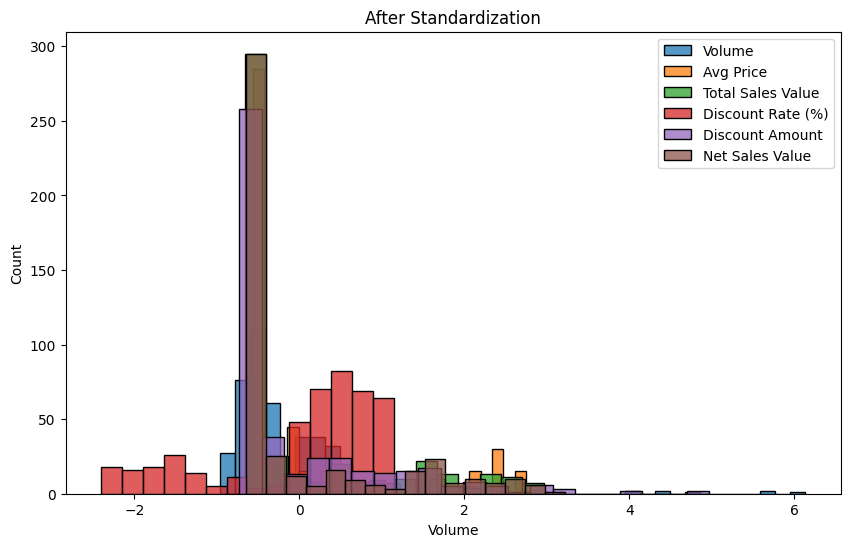

In [32]:
plt.figure(figsize=(10,6))
plt.title('After Standardization')
for columns in numerical_cols:
    sns.histplot(df[columns],label=columns)
plt.legend()
plt.show()

**Conversion of Categorical Data into Dummy Varibles**

In [33]:
df=pd.read_csv('/content/sales_data_with_discounts.csv')

In [34]:
categorical_cols=df.select_dtypes(include='object').columns
categorical_cols

Index(['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model'], dtype='object')

In [35]:
df_encoded=pd.get_dummies(df,columns=categorical_cols,drop_first=True)
df_encoded.head()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,Date_02-04-2021,Date_03-04-2021,Date_04-04-2021,Date_05-04-2021,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,15,12100,181500,11.654820,21153.498820,160346.501180,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,10,10100,101000,11.560498,11676.102961,89323.897039,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,7,16100,112700,9.456886,10657.910157,102042.089843,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,6,20100,120600,6.935385,8364.074702,112235.925298,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,3,8100,24300,17.995663,4372.946230,19927.053770,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [36]:
df_encoded.head()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,Date_02-04-2021,Date_03-04-2021,Date_04-04-2021,Date_05-04-2021,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,15,12100,181500,11.654820,21153.498820,160346.501180,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,10,10100,101000,11.560498,11676.102961,89323.897039,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,7,16100,112700,9.456886,10657.910157,102042.089843,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,6,20100,120600,6.935385,8364.074702,112235.925298,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,3,8100,24300,17.995663,4372.946230,19927.053770,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
